In [1]:
import pandas as pd
import matplotlib as plt
import sklearn as skl
import tensorflow as tf
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from pytrends.request import TrendReq
pytrend = TrendReq()

In [2]:
# Import our input dataset
wine_df = pd.read_csv('C:/Users/Yady/MIA-VIRT-DATA-PT-11-2022-U-B/FINAL PROJECT/winemag-data_first150k.csv',index_col= 'Unnamed: 0')

In [3]:
wine_df

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [4]:
#Counting the countries in the DF.
country_counts = wine_df['country'].value_counts()
country_counts

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
England 

<AxesSubplot:ylabel='Density'>

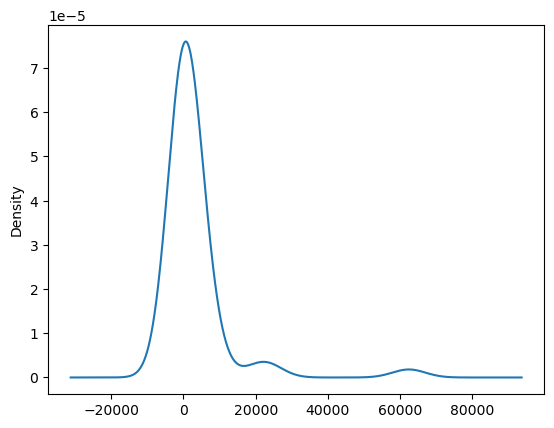

In [5]:
# Visualize the value counts for Countries.
country_counts.plot.density()

In [6]:
# Determine which values to replace
replace_countries = list(country_counts[country_counts < 1500].index)

# Replace in DataFrame
for country in replace_countries:
    wine_df.country = wine_df.country.replace(country, "Other")

# Check to make sure binning was successful
wine_df.country.value_counts()

US              62397
Italy           23478
France          21098
Spain            8268
Chile            5816
Argentina        5631
Portugal         5322
Australia        4957
New Zealand      3320
Austria          3057
Other            2871
Germany          2452
South Africa     2258
Name: country, dtype: int64

In [7]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_country_df = pd.DataFrame(enc.fit_transform(wine_df.country.values.reshape(-1,1)))

# Rename encoded columns
encode_country_df.columns = enc.get_feature_names(['country'])
encode_country_df.head()

C:\Users\Yady\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,country_Argentina,country_Australia,country_Austria,country_Chile,country_France,country_Germany,country_Italy,country_New Zealand,country_Other,country_Portugal,country_South Africa,country_Spain,country_US,country_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
wine_df['province'].fillna(value='Other', inplace=True)

In [9]:
#Counting the province in the DF.
province_counts = wine_df['province'].value_counts()
province_counts

California                       44508
Washington                        9750
Tuscany                           7281
Bordeaux                          6111
Northern Spain                    4892
                                 ...  
Pafos                                1
Central Otago-Marlborough            1
Maipo Valley-Colchagua Valley        1
Colchagua Costa                      1
Stirling                             1
Name: province, Length: 455, dtype: int64

<AxesSubplot:ylabel='Density'>

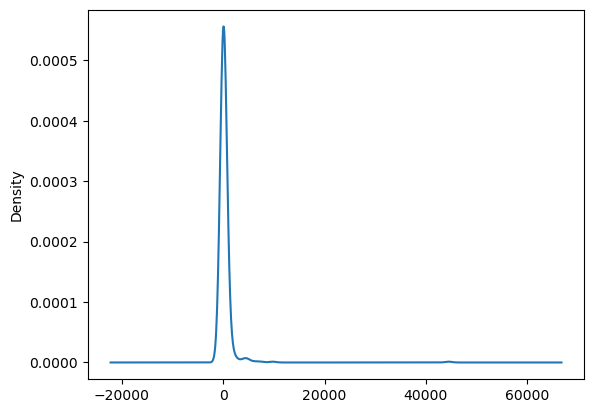

In [10]:
# Visualize the value counts for provinces.
province_counts.plot.density()

In [11]:
# Determine which values to replace
replace_province = list(province_counts[province_counts < 250].index)

# Replace in DataFrame
for province in replace_province:
    wine_df.province = wine_df.province.replace(province, "Other")

# Check to make sure binning was successful
wine_df.province.value_counts()

California        44508
Washington         9750
Other              9659
Tuscany            7281
Bordeaux           6111
                  ...  
Dão                 281
Coastal Region      281
Rheinhessen         277
Martinborough       261
Pfalz               255
Name: province, Length: 66, dtype: int64

In [12]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_province_df = pd.DataFrame(enc.fit_transform(wine_df.province.values.reshape(-1,1)))

# Rename encoded columns
encode_province_df.columns = enc.get_feature_names(['province'])
encode_province_df.head()

C:\Users\Yady\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,province_Alentejano,province_Alsace,province_Australia Other,province_Beaujolais,province_Bordeaux,province_Burgenland,province_Burgundy,province_California,province_Casablanca Valley,province_Catalonia,...,province_Tejo,province_Tuscany,province_Veneto,province_Victoria,province_Vinho Verde,province_Virginia,province_Wachau,province_Washington,province_Western Australia,province_Western Cape
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
wine_df['region_1'].fillna(value='Other', inplace=True)

In [14]:
#Counting the region_1 in the DF.
region_1_counts = wine_df['region_1'].value_counts()
region_1_counts

Other                   25060
Napa Valley              6209
Columbia Valley (WA)     4975
Mendoza                  3586
Russian River Valley     3571
                        ...  
Vallée du Paradis           1
Chignin-Bergeron            1
Roussette de Savoie         1
Savoie                      1
Coteaux du Tricastin        1
Name: region_1, Length: 1237, dtype: int64

<AxesSubplot:ylabel='Density'>

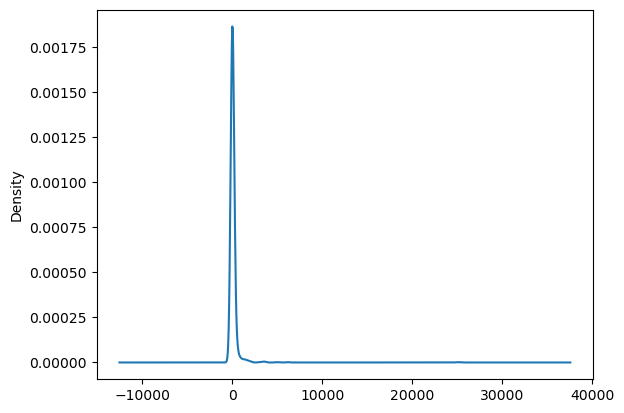

In [15]:
# Visualize the value counts for region_1.
region_1_counts.plot.density()

In [16]:
# Determine which values to replace
replace_region_1 = list(region_1_counts[region_1_counts < 200].index)

# Replace in DataFrame
for region_1 in replace_region_1:
    wine_df.region_1 = wine_df.region_1.replace(region_1, "Other")

# Check to make sure binning was successful
wine_df.region_1.value_counts()

Other                   55834
Napa Valley              6209
Columbia Valley (WA)     4975
Mendoza                  3586
Russian River Valley     3571
                        ...  
Jumilla                   205
Bolgheri Superiore        204
St. Helena                204
Beaune                    203
Pouilly-Fumé              201
Name: region_1, Length: 129, dtype: int64

In [17]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_region_1_df = pd.DataFrame(enc.fit_transform(wine_df.region_1.values.reshape(-1,1)))

# Rename encoded columns
encode_region_1_df.columns = enc.get_feature_names(['region_1'])
encode_region_1_df.head()

C:\Users\Yady\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,region_1_Alexander Valley,region_1_Alsace,region_1_Alto Adige,region_1_Amador County,region_1_Amarone della Valpolicella,region_1_Amarone della Valpolicella Classico,region_1_Anderson Valley,region_1_Arroyo Grande Valley,region_1_Arroyo Seco,region_1_Barbaresco,...,region_1_Vin de Pays d'Oc,region_1_Vino Nobile di Montepulciano,region_1_Vino de la Tierra de Castilla,region_1_Virginia,region_1_Wahluke Slope,region_1_Walla Walla Valley (WA),region_1_Washington,region_1_Willamette Valley,region_1_Yakima Valley,region_1_Yarra Valley
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
wine_df['region_2'].fillna(value='Other', inplace=True)

In [19]:
#Counting the region_2 in the DF.
region_2_counts = wine_df['region_2'].value_counts()
region_2_counts

Other                      89977
Central Coast              13057
Sonoma                     11258
Columbia Valley             9157
Napa                        8801
California Other            3516
Willamette Valley           3181
Mendocino/Lake Counties     2389
Sierra Foothills            1660
Napa-Sonoma                 1645
Finger Lakes                1510
Central Valley              1115
Long Island                  771
Southern Oregon              662
Oregon Other                 661
North Coast                  632
Washington Other             593
South Coast                  198
New York Other               147
Name: region_2, dtype: int64

<AxesSubplot:ylabel='Density'>

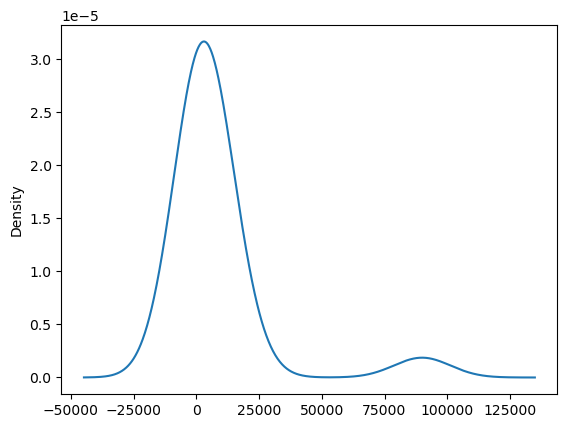

In [20]:
# Visualize the value counts for region_2.
region_2_counts.plot.density()

In [21]:
# Determine which values to replace
replace_region_2 = list(region_2_counts[region_2_counts < 25000].index)

# Replace in DataFrame
for region_2 in replace_region_2:
    wine_df.region_2 = wine_df.region_2.replace(region_2, "Other")

# Check to make sure binning was successful
wine_df.region_2.value_counts()

Other    150930
Name: region_2, dtype: int64

In [22]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_region_2_df = pd.DataFrame(enc.fit_transform(wine_df.region_2.values.reshape(-1,1)))

# Rename encoded columns
encode_region_2_df.columns = enc.get_feature_names(['region_2'])
encode_region_2_df.head()

C:\Users\Yady\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,region_2_Other
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [23]:
wine_df['variety'].fillna(value='Other', inplace=True)

In [24]:
#Counting the variety in the DF.
variety_counts = wine_df['variety'].value_counts()
variety_counts

Chardonnay                  14482
Pinot Noir                  14291
Cabernet Sauvignon          12800
Red Blend                   10062
Bordeaux-style Red Blend     7347
                            ...  
Carignan-Syrah                  1
Premsal                         1
Muskat                          1
Syrah-Carignan                  1
Carnelian                       1
Name: variety, Length: 632, dtype: int64

<AxesSubplot:ylabel='Density'>

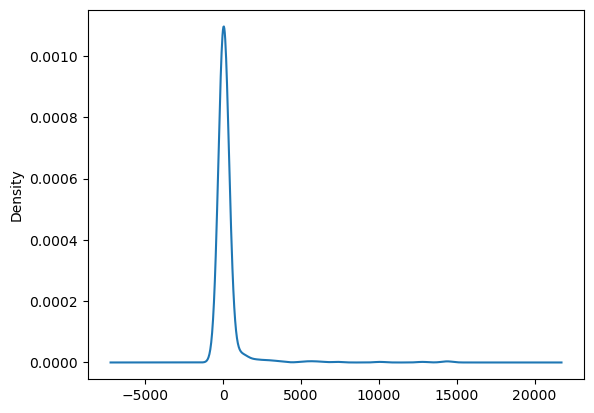

In [25]:
# Visualize the value counts for variety.
variety_counts.plot.density()

In [26]:
# Determine which values to replace
replace_variety = list(variety_counts[variety_counts < 1500].index)

# Replace in DataFrame
for variety in replace_variety:
    wine_df.variety = wine_df.variety.replace(variety, "Other")

# Check to make sure binning was successful
wine_df.variety.value_counts()

Other                            39042
Chardonnay                       14482
Pinot Noir                       14291
Cabernet Sauvignon               12800
Red Blend                        10062
Bordeaux-style Red Blend          7347
Sauvignon Blanc                   6320
Syrah                             5825
Riesling                          5524
Merlot                            5070
Zinfandel                         3799
Sangiovese                        3345
Malbec                            3208
White Blend                       2824
Rosé                              2817
Tempranillo                       2556
Nebbiolo                          2241
Portuguese Red                    2216
Sparkling Blend                   2004
Shiraz                            1970
Corvina, Rondinella, Molinara     1682
Rhône-style Red Blend             1505
Name: variety, dtype: int64

In [27]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_variety_df = pd.DataFrame(enc.fit_transform(wine_df.variety.values.reshape(-1,1)))

# Rename encoded columns
encode_variety_df.columns = enc.get_feature_names(['variety'])
encode_variety_df.head()

C:\Users\Yady\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,variety_Bordeaux-style Red Blend,variety_Cabernet Sauvignon,variety_Chardonnay,"variety_Corvina, Rondinella, Molinara",variety_Malbec,variety_Merlot,variety_Nebbiolo,variety_Other,variety_Pinot Noir,variety_Portuguese Red,...,variety_Riesling,variety_Rosé,variety_Sangiovese,variety_Sauvignon Blanc,variety_Shiraz,variety_Sparkling Blend,variety_Syrah,variety_Tempranillo,variety_White Blend,variety_Zinfandel
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
wine_df['winery'].fillna(value='Other', inplace=True)

In [29]:
#Counting the winery in the DF.
winery_counts = wine_df['winery'].value_counts()
winery_counts

Williams Selyem          374
Testarossa               274
DFJ Vinhos               258
Chateau Ste. Michelle    225
Columbia Crest           217
                        ... 
Republic of Wine           1
Prince Michel              1
Glass House                1
Jones von Drehle           1
White Knot                 1
Name: winery, Length: 14810, dtype: int64

<AxesSubplot:ylabel='Density'>

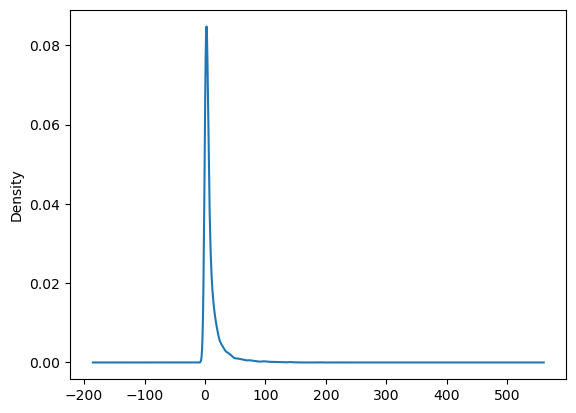

In [30]:
# Visualize the value counts for winery.
winery_counts.plot.density()

In [31]:
# Determine which values to replace
replace_winery = list(winery_counts[winery_counts < 30].index)

# Replace in DataFrame
for winery in replace_winery:
    wine_df.winery = wine_df.winery.replace(winery, "Other")

# Check to make sure binning was successful
wine_df.winery.value_counts()

Other                         84915
Williams Selyem                 374
Testarossa                      274
DFJ Vinhos                      258
Chateau Ste. Michelle           225
                              ...  
Parkers Estate                   30
Borra                            30
Hobo                             30
Château Smith Haut Lafitte       30
Palivou                          30
Name: winery, Length: 1172, dtype: int64

In [32]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_winery_df = pd.DataFrame(enc.fit_transform(wine_df.winery.values.reshape(-1,1)))

# Rename encoded columns
encode_winery_df.columns = enc.get_feature_names(['winery'])
encode_winery_df.head()

C:\Users\Yady\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,winery_:Nota Bene,winery_A to Z,winery_Abacela,winery_Abbazia Santa Anastasia,winery_Abbazia di Novacella,winery_Abeja,winery_Acacia,winery_Achaia Clauss,winery_Acorn,winery_Adami,...,winery_Yering Station,winery_Yvon Mau,winery_Zaca Mesa,winery_Zantho,winery_Zenato,winery_Zolo,winery_Zonin,winery_Zuccardi,winery_Zull,winery_àMaurice
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>")

In [34]:
# extract the description column as a list
description = wine_df['description'].tolist()
description

['This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.',
 'Ripe aromas of fig, blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla. This is full, layered, intense and cushioned on the palate, with rich flavors of chocolaty black fruits and baking spices. A toasty, everlasting finish is heady but ideally balanced. Drink through 2023.',
 'Mac Watson honors the memory of a wine once made by his mother in this tremendously delicious, balanced and complex botrytised white. Dark gold in color, it layers toasted hazelnut, pear compote and orange peel flavors, reveling in the succulence of its 122 g/L of residual sugar.',
 "This spent 20 months in 30% ne

In [35]:
# Set tokenizer parameters and fit on the text data
oov_tok = '<OOV>'
embedding_dim = 20
vocab_size = 40000
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(description)

In [36]:
# Convert the text data to sequences and pad them
max_length = 140  # or any other maximum sequence length you prefer
trunc_type = 'post'  # or 'pre', depending on how you want to truncate sequences
sequences = tokenizer.texts_to_sequences(description)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

In [37]:
# Create a new DataFrame with the padded sequences to merge with the other dataframes.
cols = ['seq_' + str(i) for i in range(max_length)]
padded_df = pd.DataFrame(padded, columns=cols)

In [38]:
# Merge the one-hot encoded dataframes
wine_df = wine_df.merge(encode_country_df, left_index=True, right_index=True)
wine_df = wine_df.merge(encode_province_df, left_index=True, right_index=True)
wine_df = wine_df.merge(encode_region_1_df, left_index=True, right_index=True)
wine_df = wine_df.merge(encode_region_2_df, left_index=True, right_index=True)
wine_df = wine_df.merge(encode_variety_df, left_index=True, right_index=True)
wine_df = wine_df.merge(encode_winery_df, left_index=True, right_index=True)
wine_df = wine_df.merge(padded_df, left_index=True, right_index=True)

# Drop the original categorical columns
wine_df = wine_df.drop(['country', 'description','designation','province', 'region_1', 'region_2', 'variety','winery'], axis=1)

In [39]:
# Split our preprocessed data into our features and target arrays
y = wine_df["points"].values
X = wine_df.drop(["points"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

C:\Users\Yady\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [47]:
print(X.shape)

(150930, 1545)


In [48]:
print(y.shape)

(150930,)


In [41]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [42]:
# Check the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 140, 20)           800000    
                                                                 
 global_average_pooling1d (G  (None, 20)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 126       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 800,133
Trainable params: 800,133
Non-trainable params: 0
_________________________________________________________________


In [43]:
#import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#Define the checkpoint path and file name
os.makedirs("checkpoint/", exist_ok=True)
checkpoint_path= "checkpoints/weights.{epoch:02d}.hdf5"

In [44]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [45]:
# Create a callback that saves the model's weights every 20 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=20)

In [46]:
# Train the model
fit_model = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "C:\Users\Yady\anaconda3\envs\mlenv\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Yady\anaconda3\envs\mlenv\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Yady\anaconda3\envs\mlenv\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Yady\anaconda3\envs\mlenv\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Yady\anaconda3\envs\mlenv\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Yady\anaconda3\envs\mlenv\lib\site-packages\keras\engine\input_spec.py", line 296, in assert_input_compatibility
        f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 140), found shape=(None, 1545)


In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Export our model to HDF5 file
model.save("Wine_Optimization.h5")

In [ ]:
#Plot results.